<a href="https://colab.research.google.com/github/Rohanpk23/Python_EDA/blob/main/EDA_on_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [3]:
# Original dataset
sales = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sales_subset.csv", parse_dates = ["date"], index_col = 0)
sales = sales.set_index("date")
sales = sales.sort_index()
sl = sales
sl

,store,type,department,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
date,,,,,,,,
2010-02-05,1,A,1,24924.50,False,5.727778,0.679451,8.106
2010-02-05,19,A,13,38597.52,False,-6.133333,0.780365,8.350
2010-02-05,2,A,31,3840.21,False,4.550000,0.679451,8.324
2010-02-05,19,A,14,17590.59,False,-6.133333,0.780365,8.350
2010-02-05,19,A,16,4929.87,False,-6.133333,0.780365,8.350
...,...,...,...,...,...,...,...,...
2012-10-05,6,A,99,440.00,False,21.577778,0.955511,5.329
2012-10-05,20,A,99,660.00,False,15.983333,1.052726,7.293
2012-10-05,39,A,99,915.00,False,22.250000,0.955511,6.228


No null values in any of the column

In [4]:
sl.isna().sum()

store                   0
type                    0
department              0
weekly_sales            0
is_holiday              0
temperature_c           0
fuel_price_usd_per_l    0
unemployment            0
dtype: int64

In [5]:
# Weekly sales, temp, fuel price and unempl
num_data = ["weekly_sales", "temperature_c", "fuel_price_usd_per_l", "unemployment"]
sl[num_data].describe()

,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000
mean,23843.950149,15.731978,0.749746,8.082009
std,30220.387557,9.922446,0.059494,0.624355
min,-1098.000000,-8.366667,0.664129,3.879000
25%,3867.115000,7.583333,0.708246,7.795000
50%,12049.065000,16.966667,0.743381,8.099000
75%,32349.850000,24.166667,0.781421,8.360000
max,293966.050000,33.827778,1.107674,9.765000


**Frequency distribution of Areas' weekly sales, tempereture, fuel price and unemployment density**.

Quick references: [For Layout details](https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py), 
[Adding new line in titles](https://stackoverflow.com/questions/2660319/putting-newline-in-matplotlib-label-with-tex-in-python),
[Engineered notation in x or y ticks](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/engineering_formatter.html) 


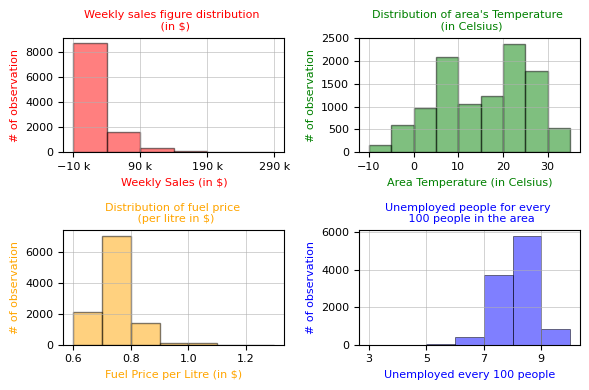

In [23]:
# fig object stores the layout and ax object has the figure details.
fig, ax = plt.subplots(2,2, dpi = 100)

# Weekly sales histogram
ax[0,0].hist(sl.weekly_sales, color = "r", edgecolor = 'k', lw = 1, bins = range(-10000, 300000, 50000), alpha = 0.5)
ax[0,0].set_xlabel("Weekly Sales (in $)", color = "r",fontsize = 8)
ax[0,0].set_ylabel("# of observation", color = "r",fontsize = 8)
ax[0,0].set_title("Weekly sales figure distribution \n (in $)", color = "r", fontsize = 8)

ax[0,0].set_yticks(range(0,10000,2000))
ax[0,0].set_xticks(range(-10000, 300000, 100000))
ax[0,0].tick_params(labelsize = 8)
f = EngFormatter(unit='')
ax[0,0].xaxis.set_major_formatter(f)
ax[0,0].grid(lw=0.4)

# Temperature histogram
ax[0,1].hist(sl.temperature_c, color = "g", edgecolor = 'k', lw = 1, bins = range(-10,40,5), alpha = 0.5)
ax[0,1].set_xlabel("Area Temperature (in Celsius)", color = "g", fontsize = 8)
ax[0,1].set_ylabel("# of observation", color = "g",fontsize = 8)
ax[0,1].set_title("Distribution of area's Temperature \n (in Celsius)", color = "g", fontsize = 8)

ax[0,1].set_yticks(range(0,3000,500))
ax[0,1].set_xticks(range(-10,40,10))
ax[0,1].tick_params(labelsize = 8)
ax[0,1].grid(lw=0.4)

# Fuel Price histogram
ax[1,0].hist(sl.fuel_price_usd_per_l, color = "orange", edgecolor = 'k', lw = 1, bins = np.arange(0.6,1.4,0.1), alpha = 0.5)
ax[1,0].set_xlabel("Fuel Price per Litre (in $)", color = "orange", fontsize = 8)
ax[1,0].set_ylabel("# of observation", color = "orange",fontsize = 8)
ax[1,0].set_title("Distribution of fuel price \n (per litre in $)", color = "orange", fontsize = 8)

ax[1,0].set_yticks(range(0,8000,2000))
ax[1,0].set_xticks(np.arange(0.6,1.4,0.2))
ax[1,0].tick_params(labelsize = 8)
ax[1,0].grid(lw=0.4)

# Unemployment histogram
ax[1,1].hist(sl.unemployment, color = "blue", edgecolor = 'k', lw = 0.7, bins = np.arange(3,11,1), alpha = 0.5)
ax[1,1].set_xlabel("Unemployed every 100 people", color = "blue", fontsize = 8)
ax[1,1].set_ylabel("# of observation", color = "blue",fontsize = 8)
ax[1,1].set_title("Unemployed people for every \n 100 people in the area", color = "blue", fontsize = 8)

ax[1,1].set_yticks(range(0,8000,2000))
ax[1,1].set_xticks(np.arange(3,11,2))
ax[1,1].tick_params(labelsize = 8)
ax[1,1].grid(lw=0.4)

# Takes care of spacing
fig.tight_layout()
plt.show()

There are **12** unique stores that are further identified by their store type ID and department ID. Store types are **A (9872) & B (902)**. There are **80 departments** **bold text**.

In [6]:
# All unique store types
tp = sl.groupby("type")["type"].count()
tp

type
A    9872
B     902
Name: type, dtype: int64

In [7]:
# All unique department ID's
dp = sl.groupby("department")["department"].count().sort_values(ascending = True)
dp

department
43      2
39      7
77     39
78     56
50     72
     ... 
25    144
24    144
23    144
30    144
41    144
Name: department, Length: 80, dtype: int64

In [8]:
# All unique store ID's
st = sl.groupby("store")["store"].count()
print('Total Stores : ' + str(st.size))
st

Total Stores : 12


store
1     901
2     897
4     901
6     894
10    902
13    913
14    885
19    906
20    910
27    900
31    890
39    875
Name: store, dtype: int64

**Analyzing the Time series data to show daily, monthly and yearly revenue generated**

In [9]:
# Year wise total and average sales
Tot_Yearly_sales = sl.groupby(sl.index.year)["weekly_sales"].agg([np.sum, np.mean])
Tot_Yearly_sales

,sum,mean
date,,
2010,2.377379e+08,24730.871917
2011,1.914128e+07,18074.865543
2012,1.556455e+04,152.593627


In [10]:
# Daily Sales for every year
Daily_sales = sl.groupby(sl.index)["weekly_sales"].sum()
Daily_sales2010 = Daily_sales.loc['2010']
Daily_sales2011 = Daily_sales.loc['2011']
Daily_sales2012 = Daily_sales.loc['2012']

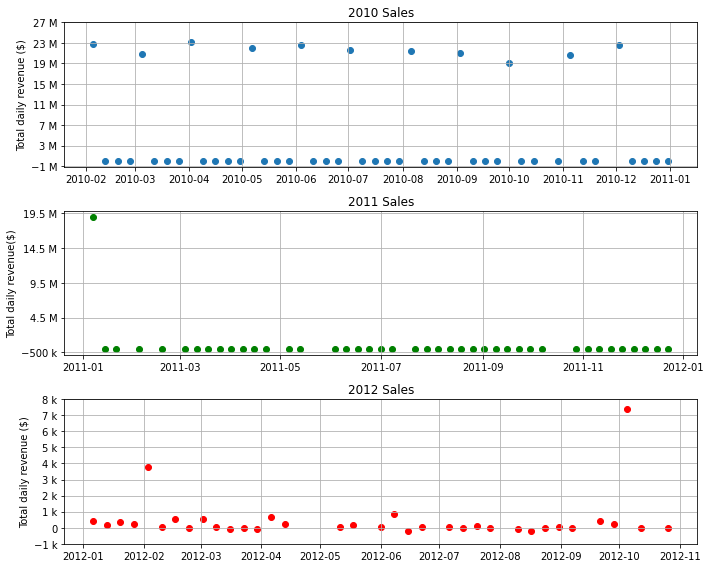

In [11]:
# figure size and layout
fig0, ax0 = plt.subplots(3,1)
fig0.set_size_inches (10, 8)

# Plotting
ax0[0].scatter(Daily_sales2010.index, Daily_sales2010[:], label = '2010', marker = 'o' )
ax0[1].scatter(Daily_sales2011.index, Daily_sales2011[:], color = 'g', label = '2011')
ax0[2].scatter(Daily_sales2012.index, Daily_sales2012[:], color = 'red', label = '2012')

# Labelling
ax0[0].set_ylabel('Total daily revenue ($)')
ax0[1].set_ylabel('Total daily revenue($)')
ax0[2].set_ylabel('Total daily revenue ($)')
ax0[0].set_title("2010 Sales")
ax0[1].set_title("2011 Sales")
ax0[2].set_title("2012 Sales")

# Formatting
f = EngFormatter(unit = '')
ax0[0].yaxis.set_major_formatter(f)
ax0[1].yaxis.set_major_formatter(f)
ax0[2].yaxis.set_major_formatter(f)

# Ticks
ax0[0].set_yticks(np.arange(-1e6, 30e6, 4e6))
ax0[1].set_yticks(np.arange(-.5e6, 21e6, 5e6))
ax0[2].set_yticks(np.arange(-1e3, 9e3, 1e3))

# Grid setting
ax0[0].grid()
ax0[1].grid()
ax0[2].grid()

# So that the figures don't overlap on each other
fig0.tight_layout()
plt.show()

**Average monthly Revenue**

In [12]:
Monthly_sales = sl.groupby(sl.index.month)["weekly_sales"].mean()
Monthly_sales

date
1     21468.810715
2     25048.794885
3     23015.854780
4     25546.738764
5     24479.196080
6     25257.589396
7     24239.591060
8     23729.857789
9     23552.331879
10    21437.300586
11    23130.452277
12    25120.645183
Name: weekly_sales, dtype: float64

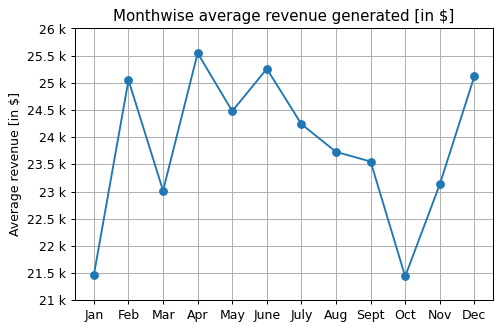

In [13]:
# Fig and ax objects to store figure and axis properties
fig1, ax1 = plt.subplots(dpi = 90)
ax1.plot(Monthly_sales.index, Monthly_sales[:], marker = 'o')

# Labelling
ax1.set_ylabel('Average revenue [in $]')
ax1.set_title('Monthwise average revenue generated [in $]')

# Ticks
month = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
ax1.set_xticks(range(1,13,1))
ax1.set_xticklabels(month)
ax1.set_yticks(range(21000,26500,500))

# Formatting and Grid setting
f1 = EngFormatter(unit='')
ax1.yaxis.set_major_formatter(f1)
ax1.grid()
plt.show()

**Stores and Department Revenue**

In [14]:
Store_sales = sl.groupby("store")["weekly_sales"].sum()
Store_sales

store
1     18828144.55
2     23786139.34
4     23540414.45
6     19275700.71
10    23178403.89
13    23431368.47
14    26889842.67
19    18057339.37
20    25828317.41
27    21786727.24
31    16179249.68
39    16113071.12
Name: weekly_sales, dtype: float64

In [15]:
Dept_sales = sl.groupby("department")["weekly_sales"].sum()
Dept_sales

department
1      4615555.27
2     10278723.28
3      2632088.25
4      6460308.53
5      5355216.00
         ...     
95    17284245.13
96     2806589.86
97     3828153.72
98     1702165.00
99       46632.21
Name: weekly_sales, Length: 80, dtype: float64

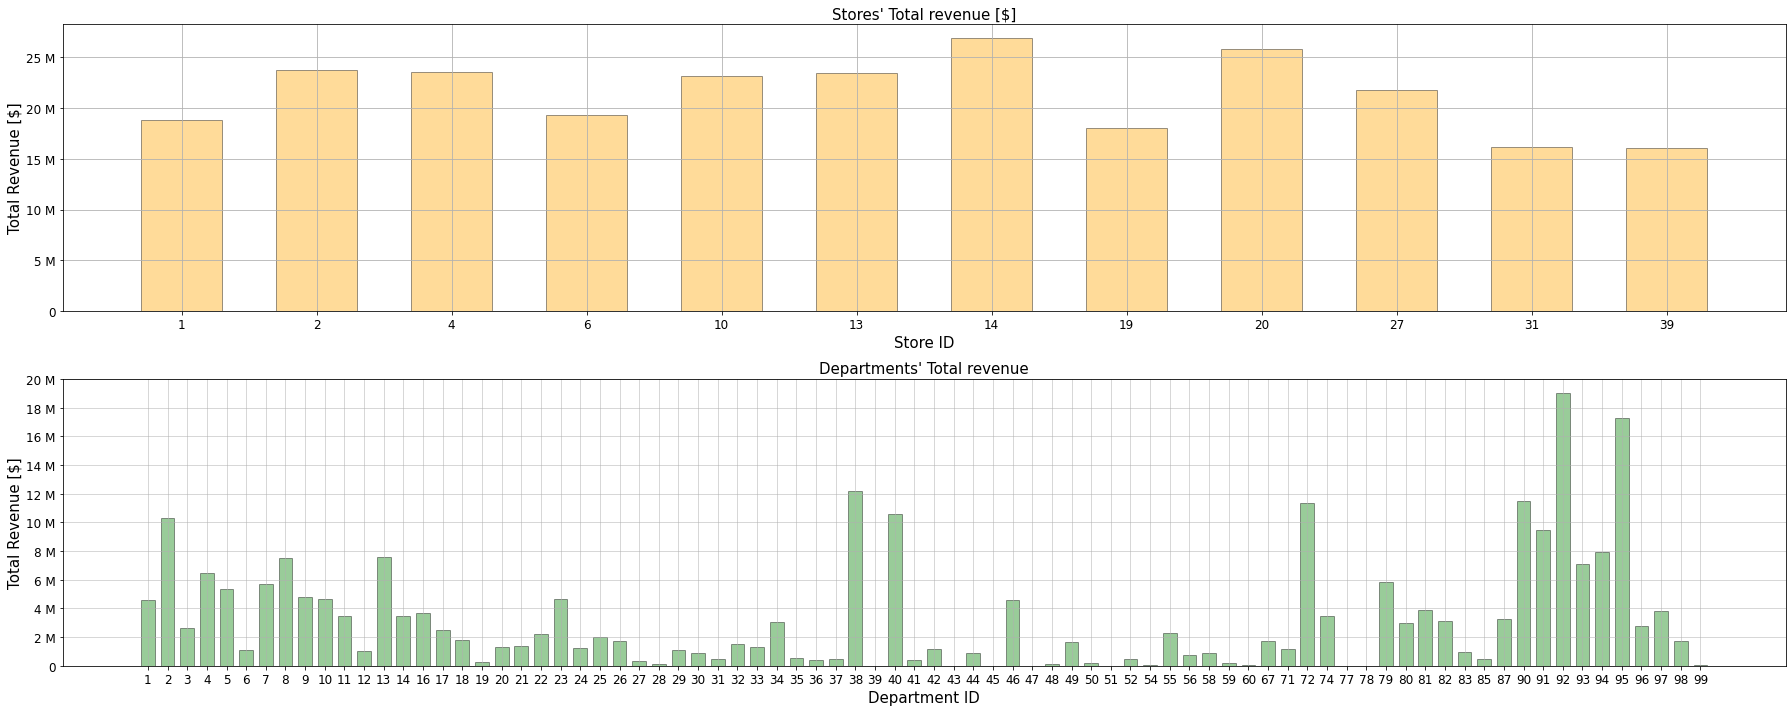

In [16]:
# Figure Properties
fig2, ax2 = plt.subplots(2,1)
fig2.set_size_inches([25,10])

# Plotting
sp1 = np.arange(1,13)  # Numpy array to bars' and ticks' spacing
sp2 = np.arange(2,162,2) 
w1 = 0.6  
w2 = 1.4        # Set the bar width
ax2[0].bar(sp1, Store_sales[:], w1, color = 'orange', alpha = 0.4, edgecolor = 'k')     # Setting bars' spacing & width
ax2[1].bar(sp2, Dept_sales[:], w2, color = 'g', edgecolor = 'k', alpha = 0.4)

# Labelling
ax2[0].set_xlabel('Store ID', fontsize = 15)
ax2[0].set_ylabel('Total Revenue [$]', fontsize = 15)
ax2[1].set_xlabel('Department ID', fontsize = 15)
ax2[1].set_ylabel('Total Revenue [$]', fontsize = 15)
ax2[0].set_title("Stores' Total revenue [$]", fontsize = 15)
ax2[1].set_title("Departments' Total revenue", fontsize = 15)

# Tick setting
ax2[0].set_xticks(sp1)                     # Setting tick Spacing
ax2[0].set_xticklabels(Store_sales.index)  # Setting tick label
ax2[1].set_xticks(sp2)   
ax2[1].set_xticklabels(Dept_sales.index)
ax2[1].set_yticks(np.arange(0, 22e6, 2e6))
ax2[0].tick_params(labelsize = 12)
ax2[1].tick_params(labelsize = 12)

# Formatting and Grid
f2 = EngFormatter(unit = '')
ax2[0].yaxis.set_major_formatter(f2)
ax2[1].yaxis.set_major_formatter(f2)
ax2[0].grid()
ax2[1].grid(lw = 0.5)

fig2.tight_layout()
plt.show()

In [17]:
# Average temperature
storeId_avg_temp = sl.groupby(by = "store", axis = 0)["temperature_c"].mean()
storeId_avg_temp

store
1     18.485707
2     18.246755
4     14.257011
6     18.738423
10    21.211327
13    10.258945
14    13.751557
19    10.668758
20    11.783010
27    13.704944
31    18.553308
39    19.395619
Name: temperature_c, dtype: float64

**Date wise weekly sales**\
Except for 12 days between Jan 2010 to Jan 2011, average weekly sales have been very low and sales frequency being high between May 2011 to May 2012

In [18]:
sales_byDate = sl.pivot_table(values = "weekly_sales", index = "date", aggfunc=[np.sum, np.mean])
sales_byDate

,sum,mean
,weekly_sales,weekly_sales
date,,
2010-02-05,22835369.84,26277.755857
2010-02-12,644.77,58.615455
2010-02-19,15.39,2.198571
2010-02-26,10.47,5.235000
2010-03-05,20862754.07,24063.153483
...,...,...
2012-09-21,389.00,389.000000
2012-09-28,224.00,224.000000


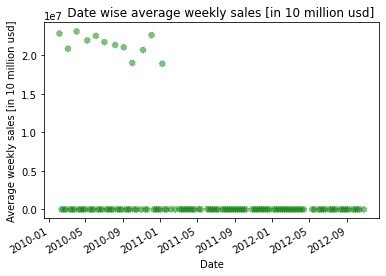

In [19]:
# Plotting
fig, ax = plt.subplots(1,1)
y = sales_byDate.iloc[:, 0]
x = pd.Series(sales_byDate.index)
ax.scatter(x,y, marker = "o", linestyle = "dotted", color = "g", alpha = 0.5)

# Labelling
ax.set_xlabel("Date")
ax.set_ylabel("Average weekly sales [in 10 million usd]")
ax.set_title("     Date wise average weekly sales [in 10 million usd]")

# Autofit
plt.gcf().autofmt_xdate()
plt.show()

**Department wise weekly sales**

In [20]:
sales_bydept = sl.groupby(by = "department")["weekly_sales"].sum()
sales_bydept

department
1      4615555.27
2     10278723.28
3      2632088.25
4      6460308.53
5      5355216.00
         ...     
95    17284245.13
96     2806589.86
97     3828153.72
98     1702165.00
99       46632.21
Name: weekly_sales, Length: 80, dtype: float64

Finding out if there is any correlation between the numerical variables

In [21]:
temp = sl.iloc[:,6] 
fuel = sl.iloc[:,7]
emp = sl.iloc[:, 8]
ws = sl.iloc[:, 4]
plt.scatter(temp, ws)

IndexError: ignored

In [ ]:
sl.index